2058311458074561.5 test


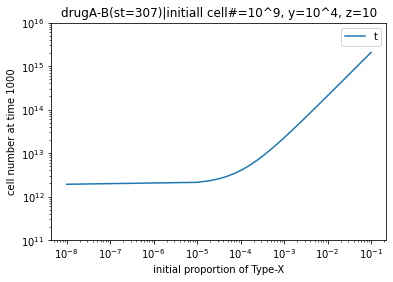

In [2]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def func(x, t, *arg):
    (a, b, c, f, g, h, k, p, q ) = arg
    dw = a*x[0] 
    dx = g*x[0] + b*x[1]
    dy = h*x[0] + c*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz]) 

initial_N = 10**9
t_end = 1000
tan = 307

aA = -0.17
bA = 0.045
cA = -0.13
fA = 0.022
gA = 0.0000001 
hA = 0.0000001 
kA = 0.0000001 
pA = 0.0000001 
qA = 0.0000001 
paramsA = (aA, bA, cA, fA, gA, hA, kA, pA, qA )
aB = -0.32
bB = -0.15
cB = 0.024
fB = 0.022
gB = 0.0000001 
hB = 0.0000001 
kB = 0.0000001 
pB = 0.0000001 
qB = 0.0000001 
paramsB = (aB, bB, cB, fB, gB, hB, kB, pB, qB )

fig = plt.figure()
ax = fig.add_subplot(111)
finalnumber = list()
xprop = list()
for x in np.arange(10, 100000000, 10000):
    xprop.append(x/initial_N)
    list_t = np.arange(0, tan, 0.01)
    list_t1 = np.arange(tan, t_end, 0.01)
    cell_init = [initial_N - x - 10**4 - 10, x, 10**4, 10]
    cells = odeint(func, cell_init, list_t, args = paramsA)
    i = len(list_t)-1
    cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]
    cell1 = odeint(func, cell1_init, list_t1, args = paramsB)
    celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
    finalnumber.append(celltotal1[-1])
ax.plot(xprop, finalnumber)
lastone = finalnumber[-1]

ax.legend('total cell number')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(10**11, 10**16)
ax.set_xlabel('initial proportion of Type-X')
ax.set_ylabel('cell number at time 1000') 
ax.set_title('drugA-B(st=307)|initiall cell#=10^9, y=10^4, z=10')

print (lastone, 'test')
plt.show()